# Обработка результатов

In [15]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
k = ['Orig']+ [20*i for i in range(0, 14)]

In [3]:
def get_graph(roc_tmp, title, columns):
    assert(len(columns) == len(roc_tmp))
    plt.figure(figsize=(18, 7))
    plt.plot(columns[1:], roc_tmp[1:], 'ro')
    plt.plot(columns[:1], roc_tmp[:1], 'bo')
    plt.xlabel('k')
    plt.ylabel('roc auc mean')
    plt.title(title)

In [4]:
def get_boxplot(roc_list, title , columns, figsize):
    tmp = np.hstack(roc_list)
    tmp = tmp.T
    assert(len(columns) == tmp.shape[1])
    dt = pd.DataFrame(tmp, columns=columns)
    color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Gray')
    dt.plot.box(color=color, sym='r+',title=title, figsize=figsize)
    plt.xlabel('k')
    plt.ylabel('roc auc mean')

In [5]:
def get_roc_results(folder):
    roc_list = []
    for result_file in os.listdir(folder):
        result = pd.read_csv(folder + '/' + result_file)
        roc_list.append(result.as_matrix(["eval_roc_auc_mean"]))
    return roc_list

In [6]:
def Go_box(folder, title, k = k, figsize = (9, 7)): get_boxplot(get_roc_results(folder), title, k, figsize=figsize)

# Построим Графики

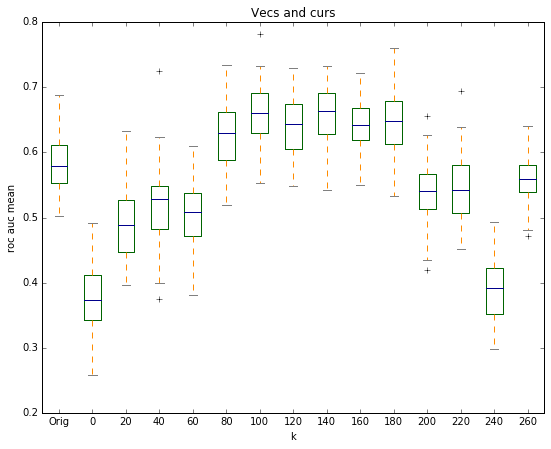

In [14]:
Go_box('LR/Ver1.0','Vecs and curs')

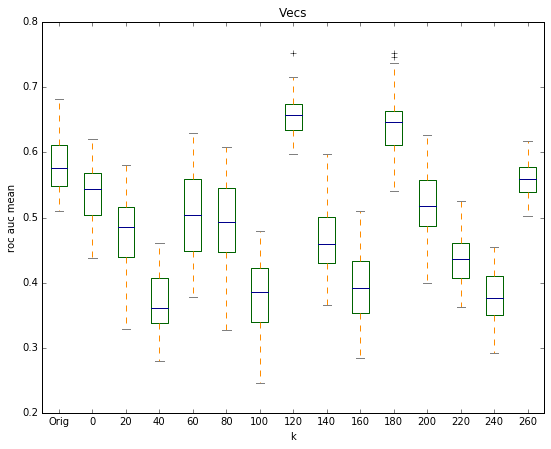

In [16]:
Go_box('LR/Ver1.1','Vecs')

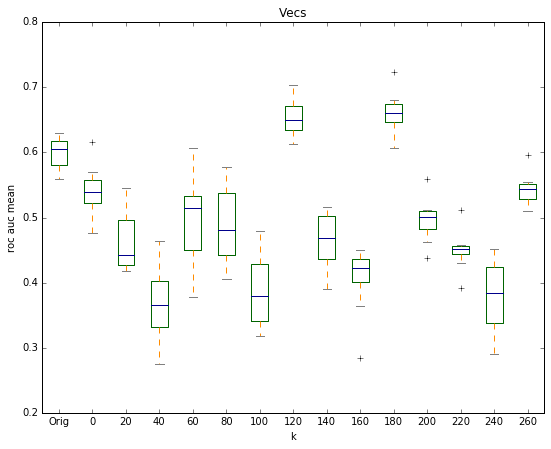

In [13]:
Go_box('LR/Ver1.2','Vecs')